In [135]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import numpy as np

data = pd.read_csv('CSWS_Population.csv')
data.head()

,country,countryCode,year,lifeExpectancy,populationFemale,populationMale,gdpPerCapita,population
0,Aruba,ABW,1960,65.66,27637.00,26574.00,nan,54211.00
1,Aruba,ABW,1961,66.07,28254.00,27184.00,nan,55438.00
2,Aruba,ABW,1962,66.44,28655.00,27570.00,nan,56225.00
3,Aruba,ABW,1963,66.79,28907.00,27788.00,nan,56695.00
4,Aruba,ABW,1964,67.11,29094.00,27938.00,nan,57032.00


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 8 columns):
country             15312 non-null object
countryCode         15312 non-null object
year                15312 non-null int64
lifeExpectancy      13747 non-null float64
populationFemale    13851 non-null float64
populationMale      13851 non-null float64
gdpPerCapita        11774 non-null float64
population          13851 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 957.1+ KB


In [3]:
data.columns

Index(['country', 'countryCode', 'year', 'lifeExpectancy', 'populationFemale',
       'populationMale', 'gdpPerCapita', 'population'],
      dtype='object')

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,year,lifeExpectancy,populationFemale,populationMale,gdpPerCapita,population
count,15312.00,13747.00,13851.00,13851.00,11774.00,13851.00
mean,1988.50,63.54,111895695.91,113330431.66,7997.92,225226127.57
std,16.74,11.16,349810964.17,357293029.08,56395.78,707073098.30
min,1960.00,18.91,16388.00,16112.00,34.74,32500.00
25%,1974.00,55.51,1026313.00,1031008.00,474.89,2062505.50
50%,1988.50,66.32,4165639.00,4106507.00,1678.27,8293678.00
75%,2003.00,72.00,27691446.50,27011586.00,6688.50,54544394.50
max,2017.00,85.42,3730312537.00,3797198983.00,5559072.45,7527511520.00


### Insights

- Between year 1960 and 2017...
- Highest life expectancy is 85
- Lowest life expectancy is 18

In [79]:
# Identify countries code that aren't countries
# Year 2017
excludeCodes = ['WLD', 'IBT', 'LMY', 'MIC', 'IBD', 'EAR', 'LMC', 'UMC', 'EAS', 'LTE', 'EAP', 'TEA', 'SAS', 'TSA', 'IDA']
data_2017 = data[(data['year'] == 2017) & (~data['countryCode'].isin(excludeCodes))]
data_2017[['country', 'population', 'populationFemale', 'populationMale', 'gdpPerCapita']].describe()
idmax = data_2017['population'].idxmax()
print('Most populous country: ', data_2017.loc[idmax])

Most populous country:  country                    China
countryCode                  CHN
year                        2017
lifeExpectancy               NaN
populationFemale    671989697.00
populationMale      714405303.00
gdpPerCapita             8826.99
population         1386395000.00
Name: 2261, dtype: object


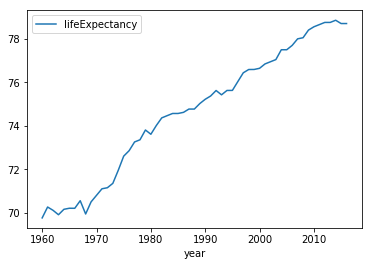

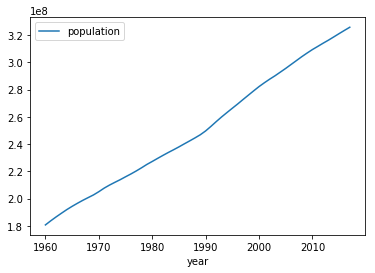

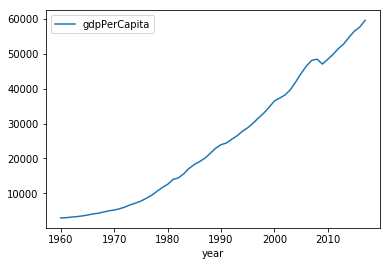

In [89]:
usa = data[data['country'] == 'United States']
usa.plot(x='year', y='lifeExpectancy')
usa.plot(x='year', y='population')
usa.plot(x='year', y='gdpPerCapita')

### Insights

* Out of 239 countries in 2017...
* Smallest population is 96K, biggest is the world

In [7]:
data_corr = data.corr()

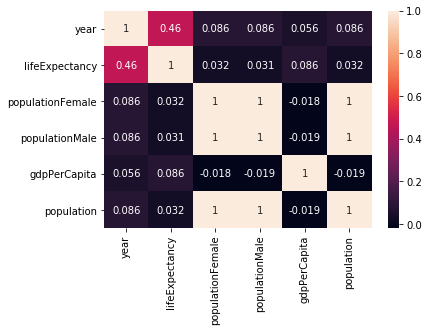

In [9]:
import seaborn as sns
sns.heatmap(data_corr, annot=True)

A few obvious correlations:
* popupationFemale vs populationMale
* populationFemale vs population
* populationMale vs population

One strong correlation (0.46): lifeExpectancy vs year

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

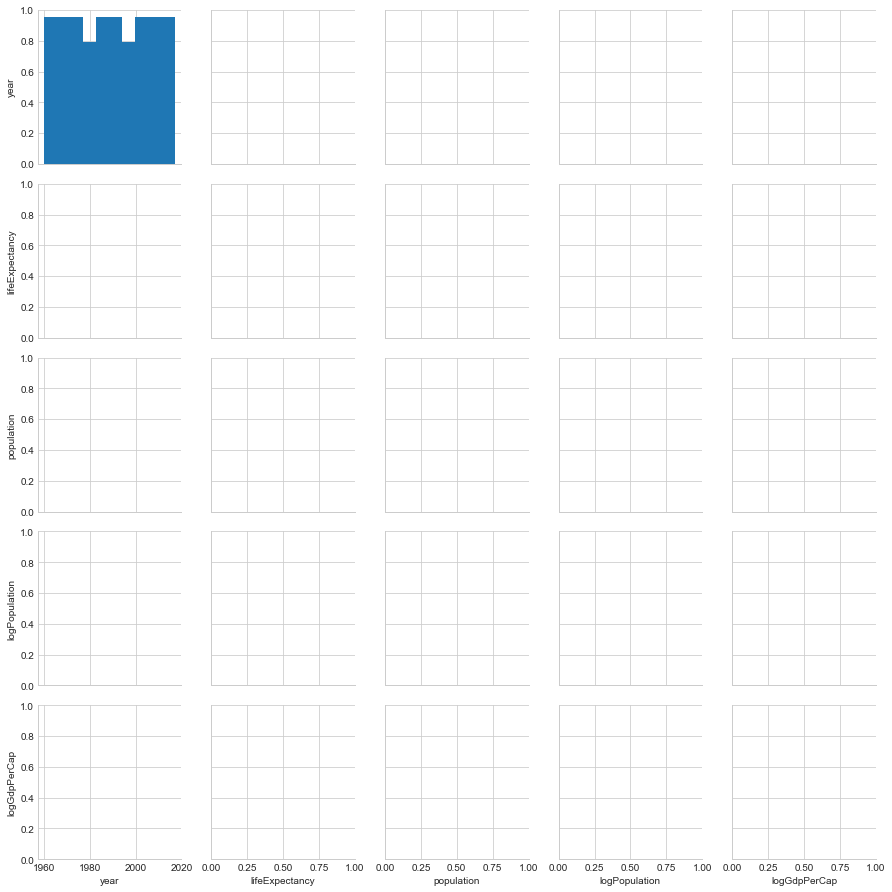

In [143]:
data2 = data
data2['logPopulation'] = np.log10(data2['population'])
data2['logGdpPerCap'] = np.log10(data2['gdpPerCapita'])
data3 = data2.drop(columns=['populationFemale', 'populationMale', 'gdpPerCapita', 'countryCode'])
sns.pairplot(data3)

# exclude non countries: [~data['countryCode'].isin(excludeCodes)]

## Step 1: Define Your Questions

> You must begin with a clear defined problem. In the blog post it was Vietnamese Population Prediction. Other examples: Analyzing and comparing China vs USA, Ranking of countries in GDP or Life Expectancy, etc.